# Plots for paper

## Imports and directories

In [2]:
import os
while "notebooks" in os.getcwd():
    os.chdir("../")


In [3]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import seaborn as sns
import pandas as pd
plt.style.use(['science'])

In [4]:
result_path = Path("results")

In [5]:
plot_directory = Path("plots")

## Plots for precision and time comparison

In [6]:
#iterations = [100, 500, 1000, 1500, 2000, 3000, 4000, 5000, 6000]
iterations = [100, 500, 1000, 2000, 4000, 6000, 8000, 10000, 15000, 20000, 25000, 30000, 35000]

def get_mean(std: float, comparison_path: Path, qmc:bool = False):

    means = []
    stds = []
    time_differences = []
    for i in iterations:
        arr = np.load(comparision_path / f'precision_comparision_std_{std}_iterations_{i}.npy')
        if qmc:
            diffs =  np.abs(arr[:, 2] - arr[:, 1])
        else:
            diffs =  np.abs(arr[:, 0] - arr[:, 1])
        mean = np.mean(arr[:, 1])
        means.append(np.mean(diffs)/mean)
        stds.append(np.std(diffs))
    return means

def get_mean_for_set_size(std: float, size: int, comparison_path: Path, qmc: bool = False):

    means = []
    stds = []
    time_differences = []
    for i in iterations:
        try:
            arr = np.load(comparison_path / f'precision_comparision_std_{std}_iterations_{i}.npy')
        except:
            return means
        arr = arr[arr[:, 3] == size]
        if qmc:
            diffs =  np.abs(arr[:, 2] - arr[:, 1])
        else:
            diffs =  np.abs(arr[:, 0] - arr[:, 1])
        mean = np.mean(arr[:, 0])
        means.append(np.mean(diffs)/mean)
        stds.append(np.std(diffs))
    return means

def plot_for_std_separate(std: float, comparision_path: Path, features_number: int):
    fig, axs = plt.subplots(1, 2, figsize=(6, 4))
    for i in range(1, features_number+1, 2):
        means = get_mean_for_set_size(std, i, comparision_path)
        means_qmc = get_mean_for_set_size(std, i, comparision_path, qmc=True)
        if i >= 12:
            axs[0].plot(iterations, means, label = str(i), linestyle='dashed')
            axs[1].plot(iterations, means_qmc, label = str(i), linestyle='dashed')
            
        else:
            axs[0].plot(iterations, means, label = str(i))
            axs[1].plot(iterations, means_qmc, label = str(i))
    
    means = get_mean(std, comparision_path)
    axs[0].plot(iterations, means, label = "Mean", linestyle = 'dashed', linewidth=2)
    axs[0].set_xlim(-1000, 35000)
    axs[1].set_xlim(-1000, 35000)
    axs[0].set_ylim(0, 0.15)#np.max(means))
    axs[1].set_ylim(0, 0.15)#np.max(means))
    axs[0].set(xlabel='Iterations', ylabel='PG Difference')
    #fig.legend(loc='center right', bbox_to_anchor=(1.35, 0.5), frameon=True)
    fig.legend(loc='center right', frameon=True)
    title = f'Mean difference in PG between methods for std = {std}'
    fig.suptitle(title)
    axs[0].set(title = "Monte Carlo") 
    axs[1].set(title = "Quasi Monte Carlo") 
    #plt.yscale("log")
    #fig.subplots_adjust(right=0.75)
    comparision_path = str(comparision_path)
    comparision_path = comparision_path[comparision_path.find('/')+1:]
    comparision_path = comparision_path[:comparision_path.find('/')]
    model_name = comparision_path
    plt.savefig(f"{plot_directory}/precision_{model_name}_{std}.jpg")
    plt.show()

In [7]:
def get_equal_number_of_iter_and_prec(std: float, size: int, comparison_path: Path, qmc = False):
    time_differences = []
    means = []
    for i in iterations:
        arr = np.load(comparision_path / f'precision_comparision_std_{std}_iterations_{i}.npy')
        if qmc:
            diffs =  np.abs(arr[:, 0] - arr[:, 1])
        else:
            diffs = np.abs(arr[:, 2] - arr[:, 1])
        mean = np.mean(arr[:, 1])
        means.append(np.mean(diffs)/mean)
        if qmc:
            t_diff = np.mean(arr[:, 6] - arr[:, 5])
        else:
            t_diff = np.mean(arr[:, 4] - arr[:, 5])
        time_differences.append(np.mean(t_diff))
    print(time_differences)
    for i in range(0, len(iterations)):
        if time_differences[i] > 0:
            iter = iterations[i] 
            break
    if qmc: 
        print(f"Number of equal iterations for QMC: {iter} with precision of {means[i]}")
    else:
        print(f"Number of equal iterations for MC: {iter} with precision of {means[i]}")


## Wine models

### Wine model single

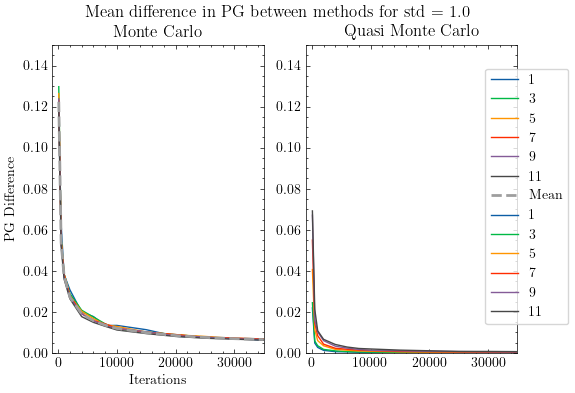

[0.0016046485634777163, 0.004229874286142298, 0.007304444719832091, 0.014131461540357222, 0.027295775169825027, 0.04075202455233545, 0.053288904007988844, 0.06694218553010316, 0.09997036918686299, 0.1414492606329839, 0.17659399888314942, 0.21311148215155684, 0.24361468415365706]
Number of equal iterations for QMC: 100 with precision of 0.12233684906758219
[0.00038597854164460025, 0.0025245853395077667, 0.005024230126107093, 0.010121898873351385, 0.02008274797559178, 0.030773486360476866, 0.04036825366563374, 0.051164645935991, 0.0757649410413568, 0.10422577904705907, 0.1302459868732387, 0.16137160473030107, 0.18622963641187956]
Number of equal iterations for MC: 100 with precision of 0.054226442510248815


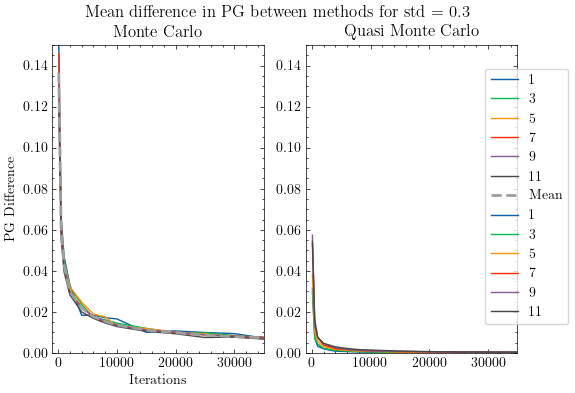

[0.0015869082564269916, 0.004089028576109717, 0.007496706651847283, 0.014038918781118378, 0.028014126450124414, 0.04233061550783985, 0.054058183370941766, 0.06827087029896685, 0.10366783064357614, 0.1362836712633971, 0.17129286325792156, 0.21385105938562834, 0.2460769396064782]
Number of equal iterations for QMC: 100 with precision of 0.13638826193705406
[0.0003712573925582561, 0.0024069460144828876, 0.005041385104696993, 0.01008052197155064, 0.020404600741827723, 0.031120735581534685, 0.040648694347889376, 0.05160670185556458, 0.07780534890380213, 0.10369713875827509, 0.13021474512162978, 0.1589114659070277, 0.1853845404295793]
Number of equal iterations for MC: 100 with precision of 0.049408964056634516


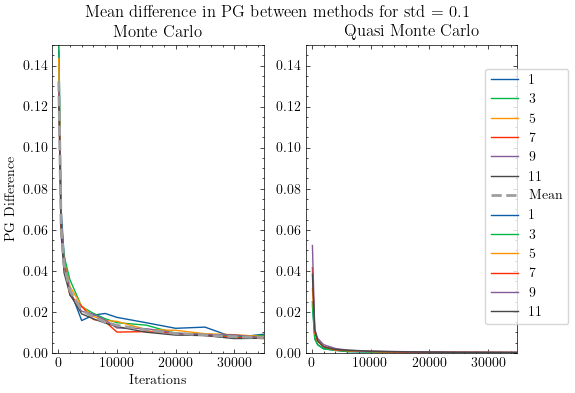

[0.0015710253443213889, 0.004077692510652738, 0.007230433312305534, 0.013760258202696338, 0.027397291697744297, 0.04085979437587237, 0.05405049841932588, 0.06728646747826791, 0.10254244741671967, 0.13806676903967025, 0.1711620660242599, 0.20595456947266, 0.24538210479363595]
Number of equal iterations for QMC: 100 with precision of 0.13233177909943145
[0.00038268840578821066, 0.0024045860902084473, 0.005012010822225564, 0.009807521443996969, 0.01991573816919961, 0.03020465201122163, 0.04059386196130752, 0.05101789449593916, 0.07663444784095566, 0.1039879973715145, 0.1300079097436874, 0.15821061106679057, 0.18435418782251836]
Number of equal iterations for MC: 100 with precision of 0.039945259210929604


In [8]:
comparision_path = Path("results/wine_model_single/")
for s in [1.0, 0.3, 0.1]:#, 0.03, 0.1, 0.3, 1.0]:
    plot_for_std_separate(s, comparision_path, 11)
    get_equal_number_of_iter_and_prec(s, comparision_path, 11, True)
    get_equal_number_of_iter_and_prec(s, comparision_path, 11, False)

### Wine model

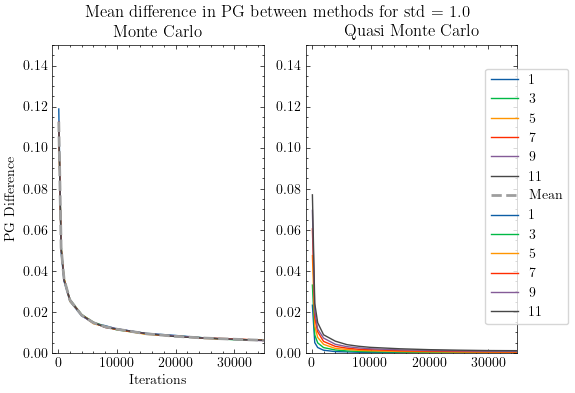

[-0.1996425617121496, -0.19257521848700526, -0.1837778859096046, -0.1676898978807793, -0.13656881792877468, -0.10615490350571617, -0.07290192743172251, -0.04041293381762416, 0.039734170346012565, 0.12052400117636275, 0.2022359864165013, 0.2832985875463233, 0.3651697520721387]
Number of equal iterations for QMC: 15000 with precision of 0.009358093759212666
[-0.20064366549322016, -0.19396594654668486, -0.1855834341726371, -0.170412225477194, -0.14105562230732122, -0.11247960867101114, -0.08109226255658174, -0.05058166255639999, 0.024443206506701086, 0.09953260871216897, 0.17545498517861735, 0.2509998771259458, 0.3267349381365291]
Number of equal iterations for MC: 15000 with precision of 0.0013093161578468838


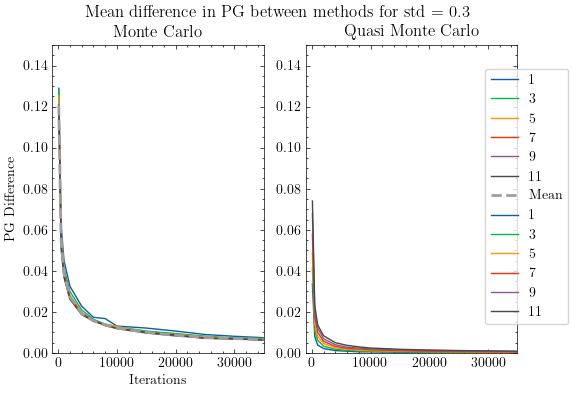

[-0.10502630731489362, -0.09818501005841322, -0.09128911780862764, -0.07540720513444243, -0.0439191388778656, -0.012172021428541322, 0.019537647708271346, 0.051177494751714396, 0.1307810182535168, 0.21167352615874915, 0.29247608531986624, 0.3704517504276902, 0.4530350661704583]
Number of equal iterations for QMC: 8000 with precision of 0.013665634234530533
[-0.10601523920635854, -0.09956436610744052, -0.09309330290824798, -0.07815466255936125, -0.04842440561480922, -0.018533409136583214, 0.011117989843589615, 0.041324712929934046, 0.11516647032945558, 0.18993989795860688, 0.2647751001897294, 0.33780429124569866, 0.41474098824944444]
Number of equal iterations for MC: 8000 with precision of 0.0020702272422769524


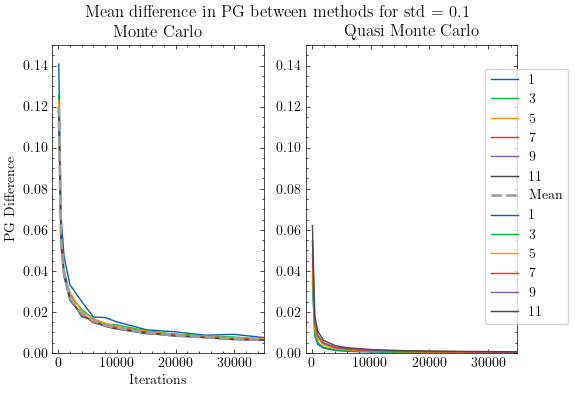

[-0.03261552392059427, -0.02623055361308912, -0.018527558701361926, -0.0027992142976695435, 0.02876461517907391, 0.060313405102641, 0.09309389194448849, 0.12723125636738555, 0.20824603020328203, 0.2901774123139662, 0.37149975169645644, 0.4436658301202282, 0.5228867480749845]
Number of equal iterations for QMC: 4000 with precision of 0.01929602869648067
[-0.03358590326281545, -0.027572247788648342, -0.020308199996101294, -0.0054910193802011125, 0.024180841763051273, 0.05377371553922131, 0.08458129279982365, 0.11650998103092856, 0.19202495759839427, 0.2681571709083216, 0.3426731764668166, 0.4099972062569187, 0.4841345611936224]
Number of equal iterations for MC: 4000 with precision of 0.0027002091212314345


In [18]:
comparision_path = Path("results/wine_model/")
for s in [1.0, 0.3, 0.1]:#, 0.03, 0.1, 0.3, 1.0]:
    plot_for_std_separate(s, comparision_path, 11)
    get_equal_number_of_iter_and_prec(s, comparision_path, 11, True)
    get_equal_number_of_iter_and_prec(s, comparision_path, 11, False)

## Housing models

### Housing model single

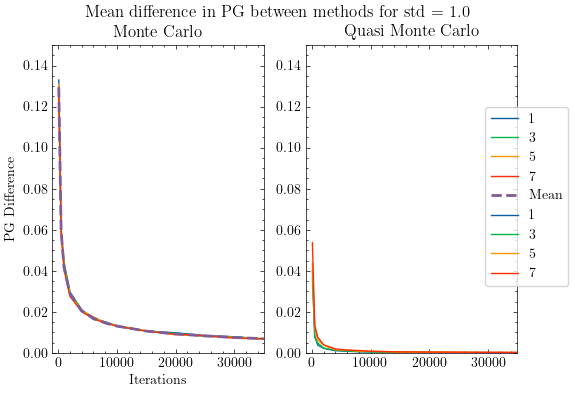

[0.0013635359287261963, 0.003638974153995514, 0.006522858464717865, 0.012641736578941345, 0.024430611324310302, 0.03565000697374344, 0.05036852045059204, 0.05967910643815994, 0.09182592129707337, 0.1218249745965004, 0.15903290201425552, 0.18676834064722062, 0.2205559314250946]
Number of equal iterations for QMC: 100 with precision of 0.12942618834133712
[0.00027427845001220706, 0.0020980071544647217, 0.004349107313156128, 0.00902275949716568, 0.018096589350700378, 0.02716031541824341, 0.03739297114610672, 0.046047619354724886, 0.07002268198728562, 0.0935806171298027, 0.11820814266204833, 0.14272258145809175, 0.16809148837327959]
Number of equal iterations for MC: 100 with precision of 0.049076708177125956


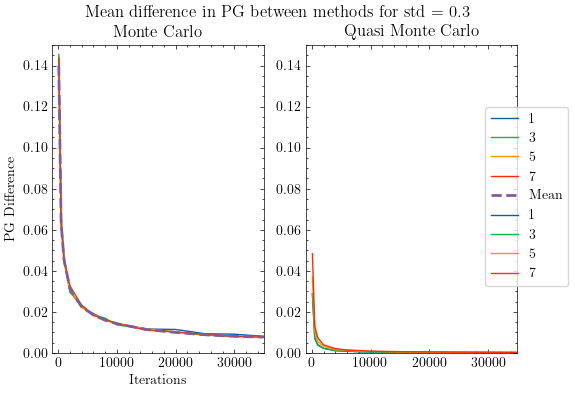

[0.0013845335364341736, 0.0036883259892463685, 0.0067542821884155274, 0.012583907198905946, 0.02473341883420944, 0.03662253507375717, 0.049990548503398895, 0.061607768297195435, 0.08717203081846236, 0.12201173639297486, 0.15157623612880708, 0.18363857914209367, 0.2127401586651802]
Number of equal iterations for QMC: 100 with precision of 0.1400189069205307
[0.00033634781837463376, 0.0021387298345565795, 0.004474501121044159, 0.008946550357341767, 0.018215605568885802, 0.02729373508691788, 0.037353943979740144, 0.04653746161460876, 0.0665144239783287, 0.09328328732252121, 0.1174264322400093, 0.14233802502155304, 0.16436767185926437]
Number of equal iterations for MC: 100 with precision of 0.04325091622259535


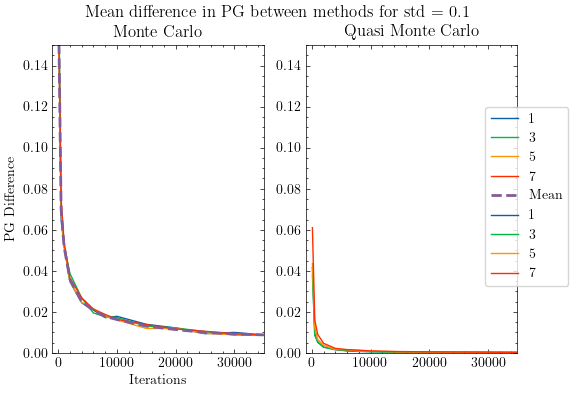

[0.0013739813685417176, 0.0037417296767234803, 0.006688879251480102, 0.01278144062757492, 0.024414680016040802, 0.03607438151836395, 0.04877149772644043, 0.06264696141481399, 0.0900374567270279, 0.12339922438859939, 0.15227762868404388, 0.18380022916793823, 0.2212011644244194]
Number of equal iterations for QMC: 100 with precision of 0.15783798973721624
[0.00029649760723114016, 0.0021658172130584715, 0.004471178901195526, 0.009109437370300294, 0.018257566976547242, 0.02725741231441498, 0.03698606796264649, 0.0469980260014534, 0.06823113342523575, 0.09378914602994919, 0.11710192868709564, 0.14050896717309952, 0.16685905566215514]
Number of equal iterations for MC: 100 with precision of 0.050938687741594185


In [19]:
comparision_path = Path("results/housing_model_single/")
for s in [1.0, 0.3, 0.1] :
    plot_for_std_separate(s, comparision_path, 8)
    get_equal_number_of_iter_and_prec(s, comparision_path, 8, True)
    get_equal_number_of_iter_and_prec(s, comparision_path, 8, False)

### Housing model

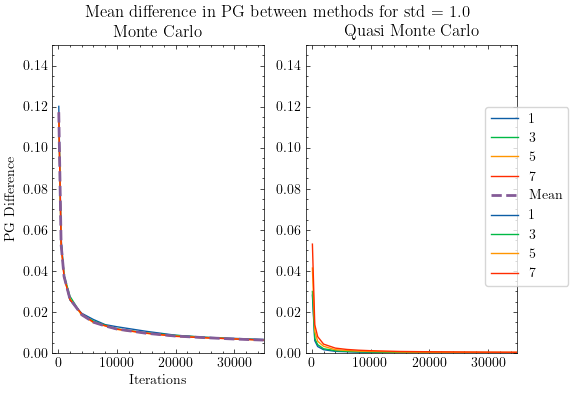

[-0.22566980258226393, -0.21856145561933518, -0.20950586104393004, -0.19120170236825942, -0.1578181223154068, -0.12413637195825576, -0.08812080450057984, -0.05578224873542786, 0.028917413175106047, 0.11535311417579651, 0.20114044959545135, 0.2868753895401955, 0.3729415746212006]
Number of equal iterations for QMC: 15000 with precision of 0.009602119424376011
[-0.22673608103990556, -0.22001052006483077, -0.21114974459409713, -0.1936672469973564, -0.16181244617700577, -0.12963141574859618, -0.0954988701224327, -0.06463345129489899, 0.015531194806098938, 0.09750424966812134, 0.17925667003393173, 0.2600143274307251, 0.341548050391674]
Number of equal iterations for MC: 15000 with precision of 0.0006113391053820286


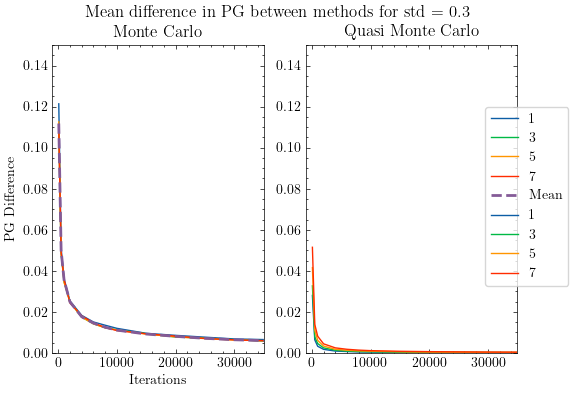

[-0.15370875880718232, -0.14775197377204896, -0.13887097101211548, -0.12211900351047515, -0.08794671655893326, -0.05279000476598739, -0.018610290598869324, 0.01385200936794281, 0.09802454733848572, 0.18311080238819122, 0.2691984583854675, 0.3548373381972313, 0.43816834704875945]
Number of equal iterations for QMC: 10000 with precision of 0.011117869326363487
[-0.15478011864423752, -0.14921248195171355, -0.140527488219738, -0.12461806703805924, -0.09199112936258316, -0.05843493868112564, -0.025994974112510682, 0.004805434596538543, 0.08464720175266266, 0.16505412316322327, 0.24614206080436707, 0.32750812767744064, 0.40720539808273315]
Number of equal iterations for MC: 10000 with precision of 0.0009806045405275823


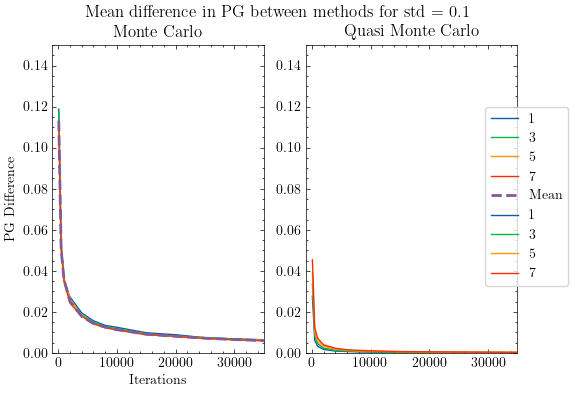

[-0.0566091076374054, -0.05004825854301453, -0.04177997522354126, -0.024759669065475463, 0.009490436065196992, 0.043083533775806426, 0.0780930849313736, 0.11343365460634232, 0.19767217004299165, 0.28759984345436096, 0.36503631372451784, 0.44940166746377946, 0.533072476887703]
Number of equal iterations for QMC: 4000 with precision of 0.01781894016089092
[-0.057611083626747134, -0.05144949572086334, -0.04338964774608612, -0.027262192332744597, 0.005367758750915527, 0.03731115642786026, 0.07034429167509079, 0.10414846428632736, 0.18382286832332612, 0.2689544659137726, 0.3416225477337837, 0.4212433174729347, 0.5009484223604203]
Number of equal iterations for MC: 4000 with precision of 0.0019738213493362376


In [20]:
comparision_path = Path("results/housing_model/")
for s in [1.0, 0.3, 0.1] :
    plot_for_std_separate(s, comparision_path, 8)
    get_equal_number_of_iter_and_prec(s, comparision_path, 8, True)
    get_equal_number_of_iter_and_prec(s, comparision_path, 8, False)

## Telemetry model

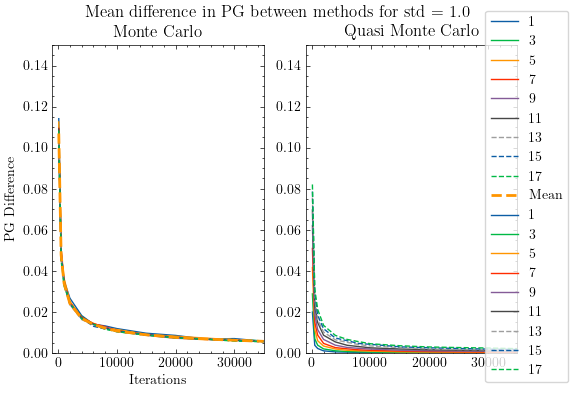

[-1.9854637591802582, -1.7346994769411022, -1.787950201087496, -1.7981634571605705, -1.4637487409423953, -1.0879896306762604, -0.9612835082782655, -0.7721114428031917, -0.11111102551639247, 0.1881495187190973, 0.8565993014694739, 1.4458511564411034, 1.8129856597785714]
Number of equal iterations for QMC: 20000 with precision of 0.007582064471877098
[-1.9925519503226705, -1.7433764511415986, -1.7999176206875915, -1.8182092827646767, -1.4953920130087595, -1.125464076850833, -1.0157384439772155, -0.8452819942140064, -0.20943391868094055, 0.07528729238907018, 0.6969862230280105, 1.240957127303398, 1.5971571211816789]
Number of equal iterations for MC: 20000 with precision of 0.001723109309930836


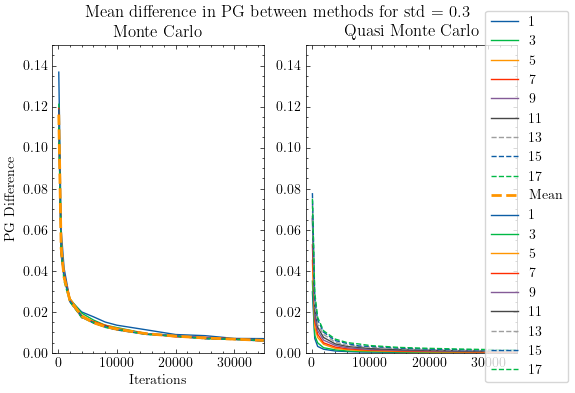

[-0.34728141223826187, -0.33599593927737187, -0.3210232485027588, -0.2925163862012586, -0.23549752799021142, -0.18001476206890152, -0.12458297559002392, -0.0684108162889866, 0.07026806708668269, 0.19686581338105463, 0.7376773932925602, 1.826617986655512, 2.797299708054513]
Number of equal iterations for QMC: 15000 with precision of 0.009394825287938047
[-0.3489292500232782, -0.33823577131257626, -0.32400972961711616, -0.29697791475350976, -0.24297900324394436, -0.19046012502090603, -0.13834830923002212, -0.08494965528764453, 0.04482753743596819, 0.15016823334424864, 0.6514913284955095, 1.630177094274256, 2.532033765456733]
Number of equal iterations for MC: 15000 with precision of 0.001769025169200984


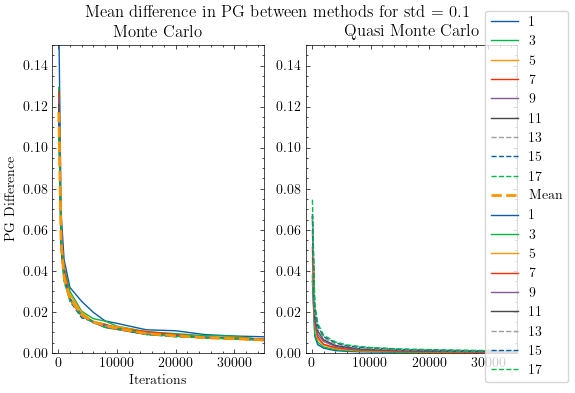

[-0.10882462542645689, -0.09754318195660146, -0.08377808491055037, -0.055448671492064845, 0.00046772352692221297, 0.05595543863726597, 0.11175990191732897, 0.16812390220217727, 0.3034073712826729, 0.4411262933041106, 0.5778251658825456, 0.7161061515708884, 0.8512740989788479]
Number of equal iterations for QMC: 4000 with precision of 0.018534957014507844
[-0.11043981872066683, -0.09975932627355828, -0.08678898874785052, -0.05999166090615323, -0.007236014716193027, 0.045143048743717, 0.09792967757829527, 0.1509004549032786, 0.27854872604950565, 0.4076789850208844, 0.5342829634471624, 0.6648574803962188, 0.7927786530423708]
Number of equal iterations for MC: 6000 with precision of 0.0029024065189343635


In [25]:
comparision_path = Path("results/telemetry_model/")
for s in [1.0, 0.3, 0.1] :
    plot_for_std_separate(s, comparision_path, 17)
    get_equal_number_of_iter_and_prec(s, comparision_path, 17, True)
    get_equal_number_of_iter_and_prec(s, comparision_path, 17, False)

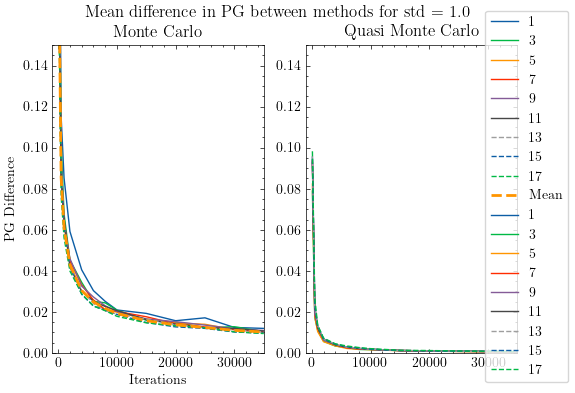

[0.00042392217478498355, 0.006943793714690466, 0.014615823610537813, 0.032105519801151665, 0.06545342800139237, 0.10032729558250149, 0.13630411716974844, 0.17142614679319376, 0.2591465850766538, 0.352082561044132, 0.4417614503687217, 0.5332370196380058, 0.6357234534429235]
Number of equal iterations for QMC: 100 with precision of 0.19157264430997584
[-0.0024780642275525934, 0.0034032676901136127, 0.009031819720037368, 0.02305010800697461, 0.04981580767787996, 0.07706694801648457, 0.1026750343258069, 0.13063405547775522, 0.19827989504641655, 0.26575964145442876, 0.3381232616065645, 0.40448606696401707, 0.4847669923553566]
Number of equal iterations for MC: 500 with precision of 0.022401065341471064


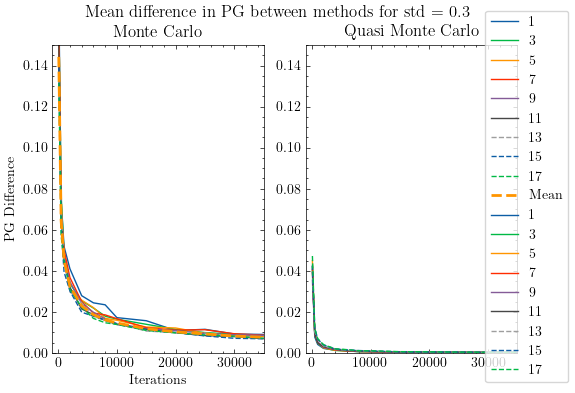

[-0.0014647983250116149, 0.0044834664126499595, 0.01473809798367742, 0.034210583874109794, 0.07309262191548067, 0.11011061622124282, 0.1473324962523805, 0.18447803439689475, 0.2775700866889839, 0.3733197420823569, 0.4699109658187463, 0.5654549181532889, 0.6553517845021386]
Number of equal iterations for QMC: 500 with precision of 0.06441880550586165
[-0.004643713333168808, 0.00046549135801934296, 0.009014235741617967, 0.02406832430304504, 0.05506108772187006, 0.08421058329690595, 0.11226674920322896, 0.14178465302584886, 0.21360626307522215, 0.28401137874717, 0.3577042335078639, 0.4278084639550782, 0.4972684404023794]
Number of equal iterations for MC: 500 with precision of 0.010544406438746637


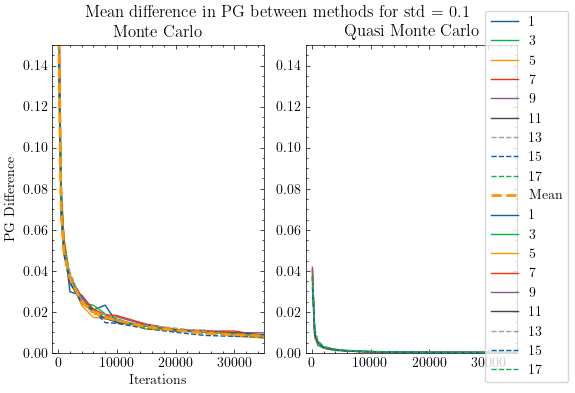

[0.000548263283527675, 0.005839052988367588, 0.014132659523045363, 0.032477876600049506, 0.06610368042528367, 0.10152893745694079, 0.13724776214005804, 0.17068763354531571, 0.2580453248775783, 0.3472551111938382, 0.43839468095912226, 0.5553637821109546, 0.6538294841523836]
Number of equal iterations for QMC: 100 with precision of 0.1529696518858554
[-0.002226638586438146, 0.0023629539081600963, 0.008652478778491072, 0.02327827953633999, 0.05037280684616528, 0.07714433310364856, 0.10439095314906663, 0.12907710939753098, 0.19825231470838459, 0.2638338295971694, 0.3314173066792559, 0.4215572707745589, 0.49687924188058247]
Number of equal iterations for MC: 500 with precision of 0.009572783597874938


In [26]:
comparision_path = Path("results/telemetry_model_single/")
for s in [1.0, 0.3, 0.1] :
    plot_for_std_separate(s, comparision_path, 17)
    get_equal_number_of_iter_and_prec(s, comparision_path, 17, True)
    get_equal_number_of_iter_and_prec(s, comparision_path, 17, False)

## Get relative error for model, std, iterations

## Ranking errors

### Utils

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
def plot_ranking_validation(result_path: Path, stds, feature_numbers, noising=False):
    fig, axs = plt.subplots(1, 3, figsize=(12, 8))
    df = pd.DataFrame(columns=["method", "value", "stddev"])
    for n in feature_numbers:
        for s in stds:
            if noising:
                arr = np.load(result_path / f"ranking_comparision/ranking_comparision_noising_std_{s}_tested_features_{n}.npy")
            else:
                arr = np.load(result_path / f"ranking_comparision/ranking_comparision_retraining_std_{s}_tested_features_{n}.npy")

            for i in range(0, arr.shape[1]):
                point = arr[:, i]
                pg_err = ((point[0] - point[3]))**2
                shap_err = ((point[1] - point[3]))**2
                df = pd.concat([df, pd.DataFrame([{"method": f"PG", "value": pg_err, "stddev":
                                        s}])],
                    ignore_index=True) 

                df = pd.concat([df, pd.DataFrame([{"method": f"SHAP", "value": shap_err, "stddev":
                                        s}])],
                    ignore_index=True) 
        #print(df)
        sns.barplot(df, y="value", x="stddev", hue="method", ax = axs[n-1]).set(title = f"Deleted features = {n}")




### Wine model

#### Retraining model

/tmp/ipykernel_94689/1641357753.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{"method": f"PG", "value": pg_err, "stddev":


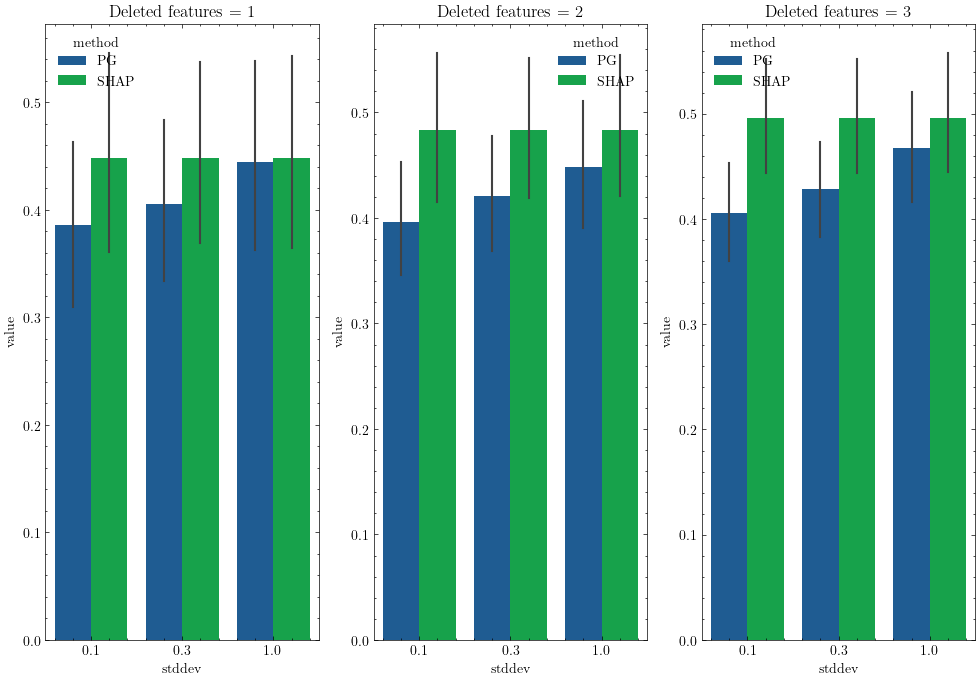

In [23]:
plot_ranking_validation(Path("results/wine_model/"), [0.1, 0.3, 1.0], [1, 2, 3], False)

/tmp/ipykernel_94689/1641357753.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{"method": f"PG", "value": pg_err, "stddev":


FileNotFoundError: [Errno 2] No such file or directory: 'results/wine_model/ranking_comparision/ranking_comparision_retraining_std_1.5_tested_features_1.npy'

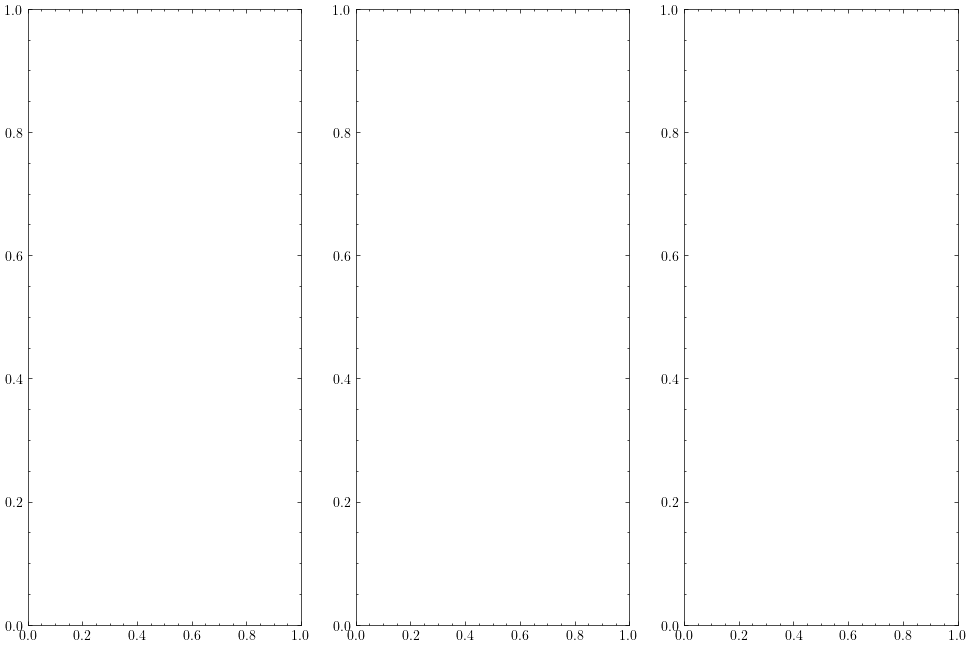

In [24]:
plot_ranking_validation(Path("results/wine_model/"), [0.1, 0.3, 1.0, 1.5, 2.0], [1, 2, 3], False)

#### Noising model

/tmp/ipykernel_89374/1641357753.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{"method": f"PG", "value": pg_err, "stddev":


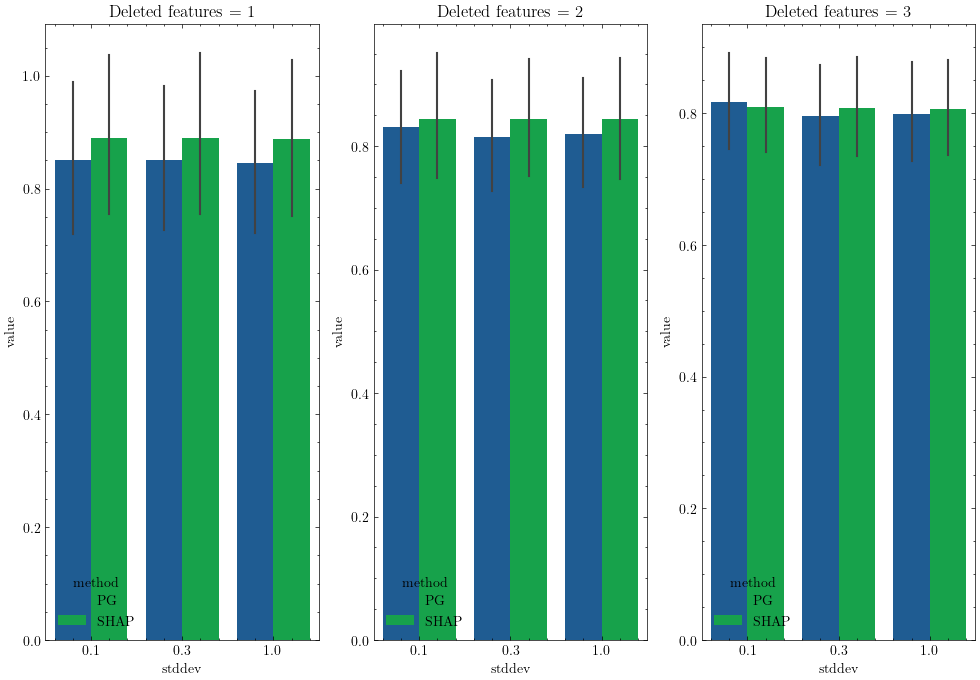

In [ ]:
plot_ranking_validation(Path("results/wine_model/"), [0.1, 0.3, 1.0], [1, 2, 3], True)

/tmp/ipykernel_89374/1641357753.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{"method": f"PG", "value": pg_err, "stddev":


FileNotFoundError: [Errno 2] No such file or directory: 'results/wine_model/ranking_comparision/ranking_comparision_noising_std_1.5_tested_features_1.npy'

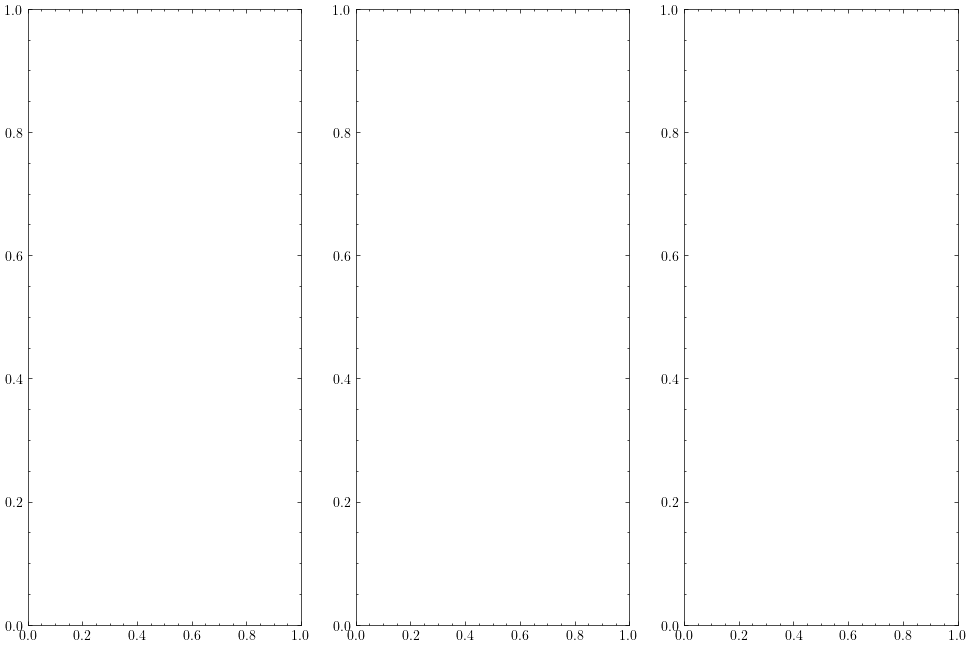

In [ ]:
plot_ranking_validation(Path("results/wine_model/"), [0.1, 0.3, 1.0, 1.5, 2.0], [1, 2, 3], True)

### Housing model

#### Retraining model

/tmp/ipykernel_89374/1641357753.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{"method": f"PG", "value": pg_err, "stddev":


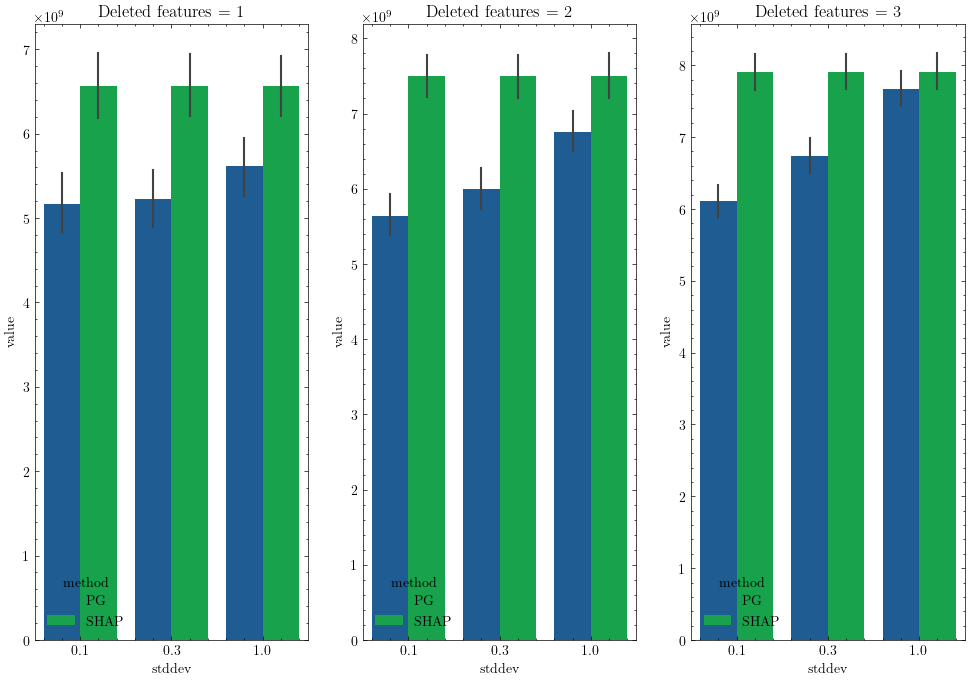

In [ ]:
plot_ranking_validation(Path("results/housing_model/"), [0.1, 0.3, 1.0], [1, 2, 3], False)

/tmp/ipykernel_89374/1641357753.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{"method": f"PG", "value": pg_err, "stddev":


FileNotFoundError: [Errno 2] No such file or directory: 'results/housing_model/ranking_comparision/ranking_comparision_retraining_std_1.5_tested_features_2.npy'

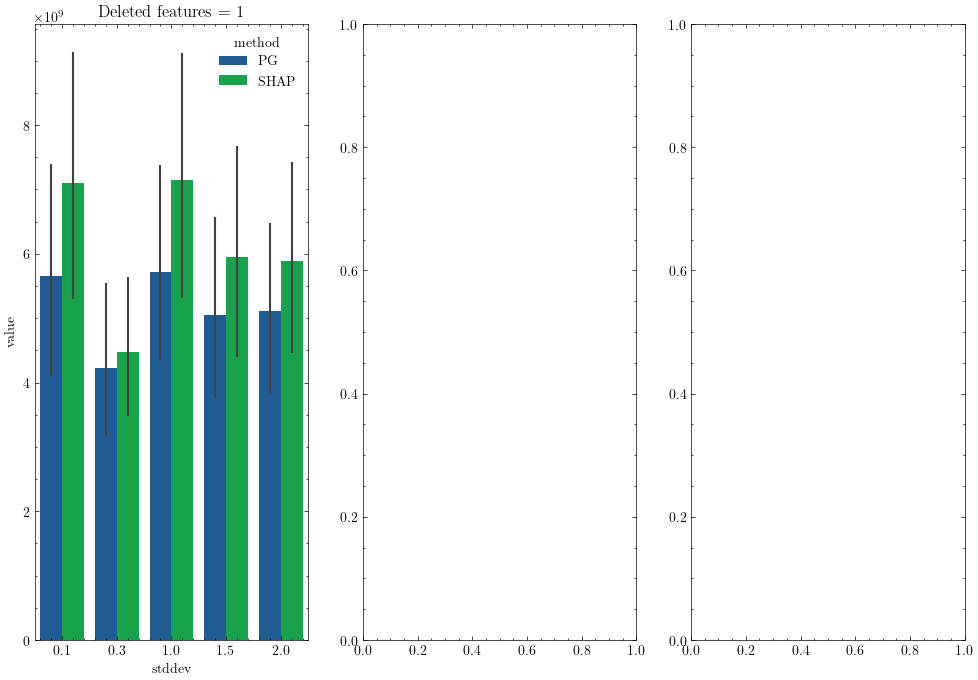

In [ ]:
plot_ranking_validation(Path("results/housing_model/"), [0.1, 0.3, 1.0, 1.5, 2.0], [1, 2], False)

#### Noising model

/tmp/ipykernel_89374/1641357753.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{"method": f"PG", "value": pg_err, "stddev":


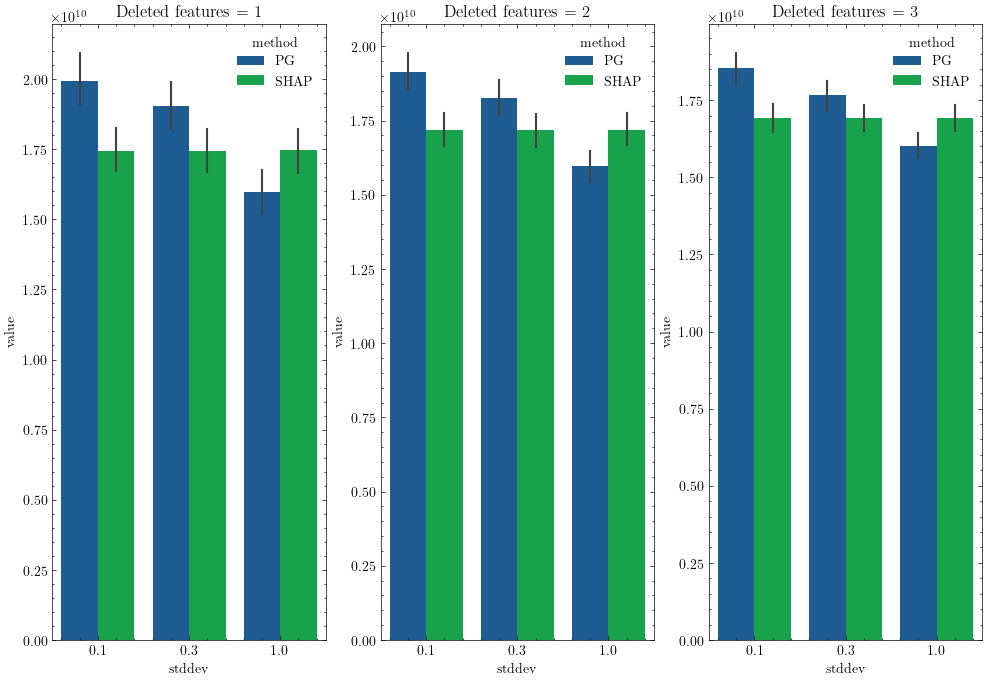

In [ ]:
plot_ranking_validation(Path("results/housing_model/"), [0.1, 0.3, 1.0], [1, 2, 3], True)

### Telemetry model

#### Retraining

/tmp/ipykernel_94689/1641357753.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{"method": f"PG", "value": pg_err, "stddev":


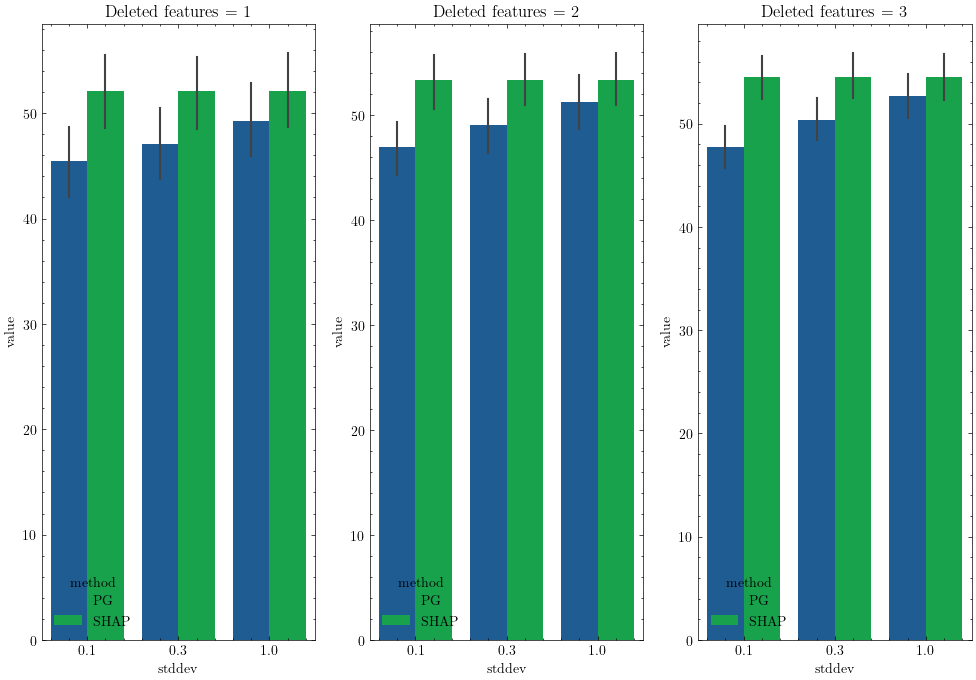

In [30]:
plot_ranking_validation(Path("results/telemetry_model/"), [0.1, 0.3, 1.0], [1, 2, 3], False)

#### Noising

/tmp/ipykernel_94689/1641357753.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{"method": f"PG", "value": pg_err, "stddev":


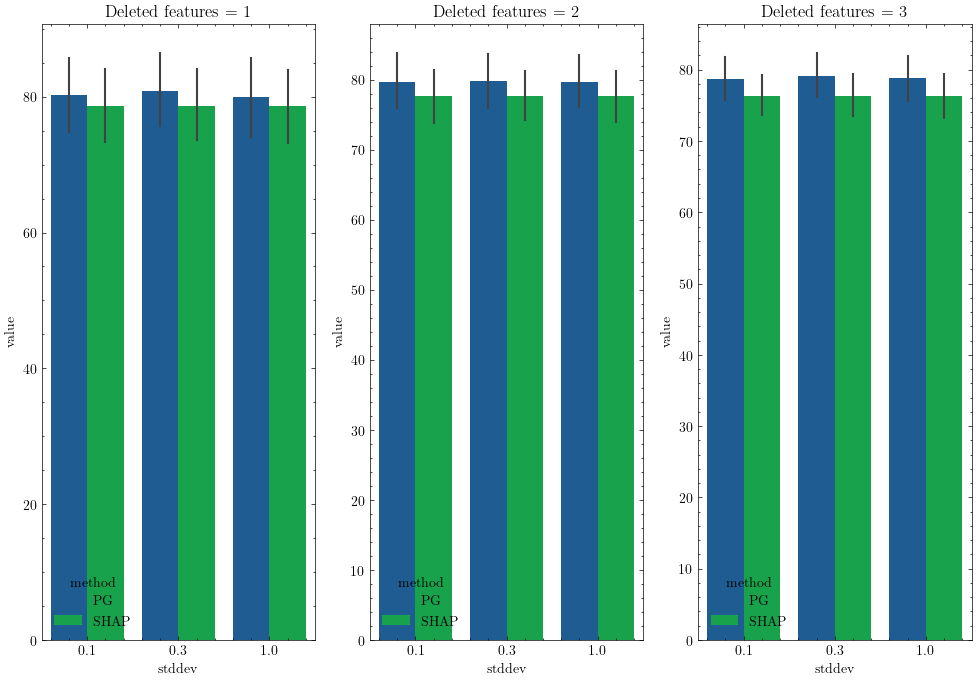

In [31]:
plot_ranking_validation(Path("results/telemetry_model/"), [0.1, 0.3, 1.0], [1, 2, 3], True)